## Titanic Exploratory Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import dataset

df = pd.read_csv(r'C:\Users\sreed\Downloads\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


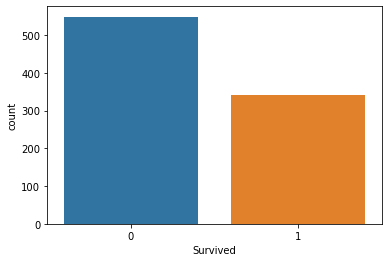

In [4]:
# Plot a countplot to find the number of passengers survived

sns.countplot(x=df['Survived'])

In [5]:
# Here we can see that number of people survived is less

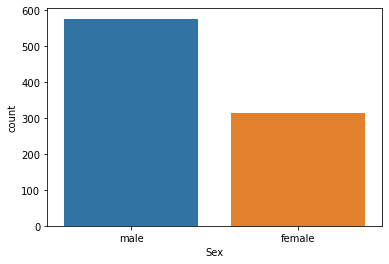

In [6]:
# Now lets find the number of males and females

sns.countplot(x=df['Sex'])

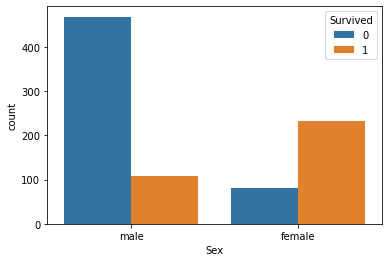

In [7]:
# We have to see how many males and females are survived

sns.countplot(x=df['Sex'], hue=df['Survived'])

In [8]:
# From the above plot we can see that females survived more than males

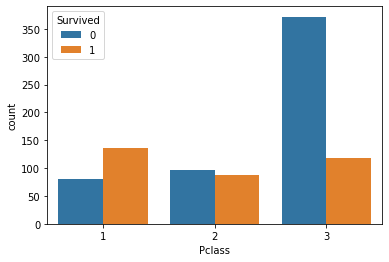

In [9]:
# Find which class passengers has survived more

sns.countplot(x=df['Pclass'], hue=df['Survived'])

In [10]:
# Here we can't find exactly which class passengers survived more but most of the people in 3rd class couldn't survive

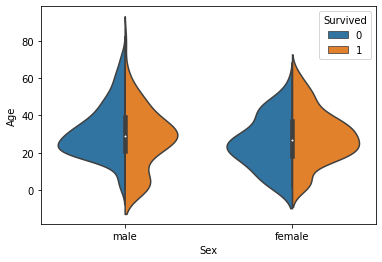

In [11]:
# We can plot number of survivors based on age and sex

sns.violinplot(x=df['Sex'], y=df['Age'], hue=df['Survived'], split=True)

In [12]:
# People between age of 20-40 is highly likely to be survived. Out of which females have higher survival rate.
# For males with more age, the chance of survival is less.

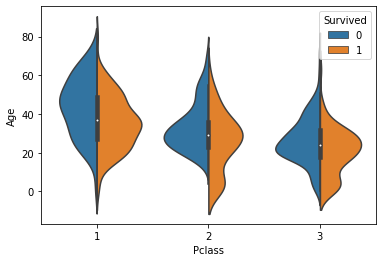

In [13]:
# We can plot number of survivors based on age and pclass

sns.violinplot(x=df['Pclass'], y=df['Age'], hue=df['Survived'], split=True)

In [14]:
# Children with age less than 10 is having more survival rate in all classes.
# Passenger in class 3 within age group 20-40 is more likely to survive.

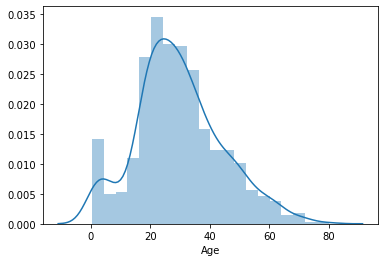

In [15]:
# Distribution plot to find age distribution

sns.distplot(df['Age'])

In [16]:
# Check for null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Since Cabin and embarked is not giving any details for the prediction we can remove it

df.drop(['Cabin', 'Embarked'], axis=1, inplace=True)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [19]:
# Lets drop Name, Ticket and Fare which is also not required

df.drop(['Name', 'Ticket', 'Fare', 'PassengerId'], axis=1, inplace=True)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [21]:
# Replace the missing age values with it mean

age_mean = df['Age'].mean()

In [22]:
df['Age'].fillna(age_mean, inplace=True)

In [23]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [24]:
df['Sex'] = pd.Categorical(df['Sex']).codes

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


### Model Building

In [26]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.model_selection import train_test_split #training and testing data split

In [27]:
x = df.drop(['Survived'], axis=1)
Y = df['Survived']

In [30]:
x = x.values
Y = Y.values

In [31]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3,random_state=0,stratify=df['Survived'])

In [32]:
model = LogisticRegression()
model.fit(x_train, Y_train)

LogisticRegression()

In [34]:
Y_predict = model.predict(x_test)

In [36]:
model.score(x_test, Y_test)

0.7947761194029851